In [41]:
import json
import sys
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

df_posts = pd.read_csv("../DATA/cleaned_posts.csv")
df_comments = pd.read_csv("../DATA/cleaned_comments.csv")

In [42]:
df_posts['text'] = df_posts['text'].astype(str)
df_comments['text'] = df_comments['text'].astype(str)

In [43]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/elaineshagdarjav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
def add_sentiment_scores(df):
    # Initialize VADER SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    df['text'] = df['text'].astype(str).str.strip()

    # Calculate sentiment scores
    df['compound_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['positive_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['pos'])
    df['negative_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['neg'])
    df['neutral_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['neu'])
    return df

posts_scored = add_sentiment_scores(df_posts)
comments_scored = add_sentiment_scores(df_comments)

In [45]:
def filter_by_keyword(df, keyword):
    # Filter for posts/comments that contain the specified keyword (case insensitive)
    return df[df['text'].str.contains(keyword, case=False, na=False)]

posts_filtered = filter_by_keyword(posts_scored, 'biden')
comments_filtered = filter_by_keyword(comments_scored, 'biden')

In [47]:
posts_filtered.describe()

,created_utc,ups,compound_sentiment_score,positive_sentiment_score,negative_sentiment_score,neutral_sentiment_score
count,9.890000e+02,989.000000,989.000000,989.000000,989.000000,989.000000
mean,1.721478e+09,84.675430,0.047356,0.082413,0.076390,0.841185
std,2.658780e+05,325.855018,0.429822,0.117014,0.117899,0.153137
min,1.720915e+09,0.000000,-0.997600,0.000000,0.000000,0.244000
25%,1.721266e+09,1.000000,-0.202300,0.000000,0.000000,0.743000
50%,1.721521e+09,1.000000,0.000000,0.000000,0.000000,0.849000
75%,1.721660e+09,15.000000,0.340000,0.151000,0.140000,1.000000
max,1.722113e+09,4988.000000,0.999500,0.697000,0.660000,1.000000


In [34]:
comments_filtered.describe()

,created_utc,ups,compound_sentiment_score,positive_sentiment_score,negative_sentiment_score,neutral_sentiment_score
count,1.093400e+04,10934.000000,10934.000000,10934.000000,10934.000000,10934.000000
mean,1.721476e+09,8.995336,0.079552,0.107372,0.089781,0.802845
std,2.788258e+05,39.755202,0.615735,0.086197,0.079944,0.105864
min,1.720915e+09,-175.000000,-0.999300,0.000000,0.000000,0.240000
25%,1.721269e+09,1.000000,-0.476700,0.046000,0.024000,0.739000
50%,1.721501e+09,2.000000,0.064400,0.098000,0.080000,0.804000
75%,1.721662e+09,6.000000,0.652850,0.153000,0.133000,0.870000
max,1.722124e+09,1567.000000,0.999300,0.737000,0.760000,1.000000


In [65]:
num_rows = posts_scored.shape[0]
print(f'Number of rows in posts_scored: {num_rows}')
num_rows = posts_filtered.shape[0]
print(f'Number of rows in posts_filtered: {num_rows}')
num_rows = comments_scored.shape[0]
print(f'Number of rows in comments_scored: {num_rows}')
num_rows = comments_filtered.shape[0]
print(f'Number of rows in comments_filtered: {num_rows}')


Number of rows in posts_scored: 6146
Number of rows in posts_filtered: 989
Number of rows in comments_scored: 80285
Number of rows in comments_filtered: 10934


In [50]:
comments_filtered.describe()

,created_utc,ups,compound_sentiment_score,positive_sentiment_score,negative_sentiment_score,neutral_sentiment_score
count,1.093400e+04,10934.000000,10934.000000,10934.000000,10934.000000,10934.000000
mean,1.721476e+09,8.995336,0.079552,0.107372,0.089781,0.802845
std,2.788258e+05,39.755202,0.615735,0.086197,0.079944,0.105864
min,1.720915e+09,-175.000000,-0.999300,0.000000,0.000000,0.240000
25%,1.721269e+09,1.000000,-0.476700,0.046000,0.024000,0.739000
50%,1.721501e+09,2.000000,0.064400,0.098000,0.080000,0.804000
75%,1.721662e+09,6.000000,0.652850,0.153000,0.133000,0.870000
max,1.722124e+09,1567.000000,0.999300,0.737000,0.760000,1.000000


In [51]:
filtered = posts_scored[posts_scored['compound_sentiment_score'] == 0.0]
print(filtered[['compound_sentiment_score', 'positive_sentiment_score', 'negative_sentiment_score', 'neutral_sentiment_score']])

      compound_sentiment_score  positive_sentiment_score  \
3                          0.0                       0.0   
4                          0.0                       0.0   
5                          0.0                       0.0   
6                          0.0                       0.0   
7                          0.0                       0.0   
...                        ...                       ...   
6137                       0.0                       0.0   
6140                       0.0                       0.0   
6143                       0.0                       0.0   
6144                       0.0                       0.0   
6145                       0.0                       0.0   

      negative_sentiment_score  neutral_sentiment_score  
3                          0.0                      1.0  
4                          0.0                      1.0  
5                          0.0                      1.0  
6                          0.0                 

In [62]:
def plot_average_sentiment(posts_df, text_type):
    # Calculate the average sentiment score per subreddit
    average_sentiment = posts_df.groupby('subreddit')['compound_sentiment_score'].mean().reset_index()

    ordered_subreddits = ['democrats', 'Republican', 'PoliticalDiscussion']

    # Create a bar plot for average sentiment
    plt.figure(figsize=(10, 6))
    sns.barplot(x='subreddit', y='compound_sentiment_score', data=average_sentiment, palette='coolwarm', order=ordered_subreddits)
    
    # Add titles and labels
    #plt.title('Average Sentiment Score Of Posts per Subreddit', fontsize=16)
    plt.title('Average Sentiment Score of ' + text_type+ ' per Subreddit', fontsize=16)

    plt.xlabel('Subreddit', fontsize=14)
    plt.ylabel('Average Sentiment Score', fontsize=14)
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

/var/folders/3k/v4jx042d3j143170j5840qv40000gn/T/ipykernel_62173/395197707.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subreddit', y='compound_sentiment_score', data=average_sentiment, palette='coolwarm', order=ordered_subreddits)


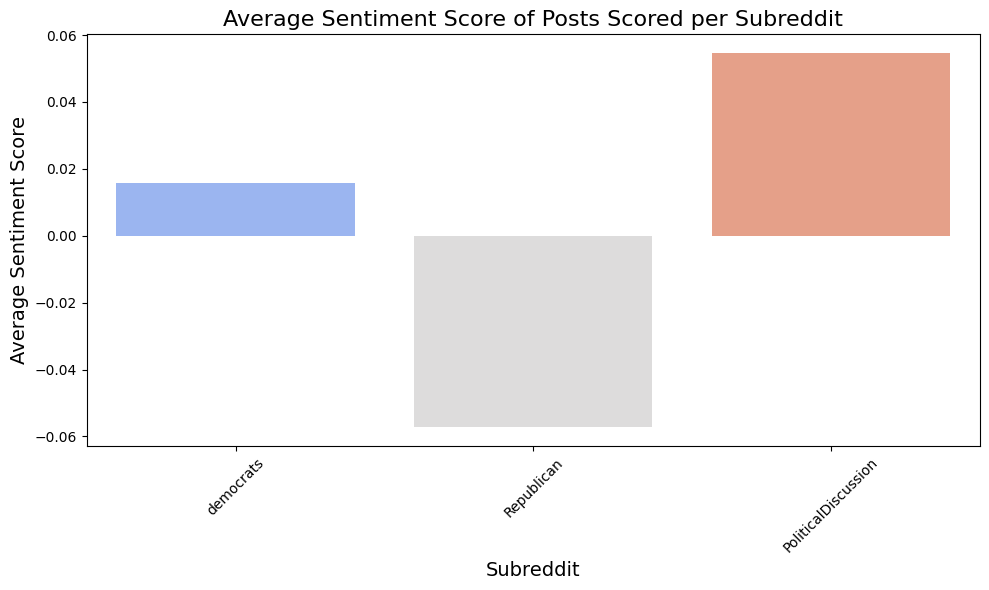

/var/folders/3k/v4jx042d3j143170j5840qv40000gn/T/ipykernel_62173/395197707.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subreddit', y='compound_sentiment_score', data=average_sentiment, palette='coolwarm', order=ordered_subreddits)


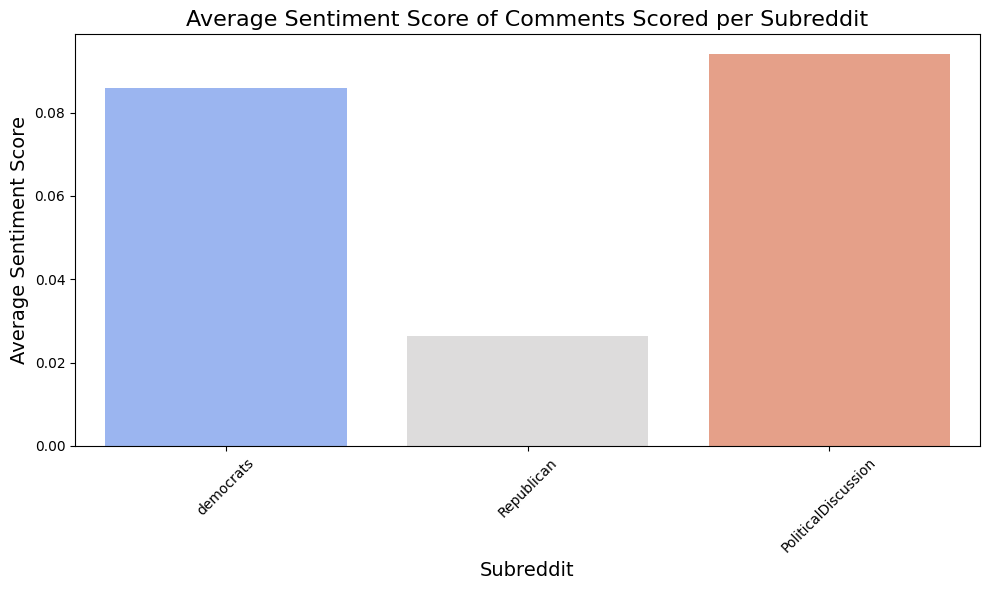

/var/folders/3k/v4jx042d3j143170j5840qv40000gn/T/ipykernel_62173/395197707.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subreddit', y='compound_sentiment_score', data=average_sentiment, palette='coolwarm', order=ordered_subreddits)


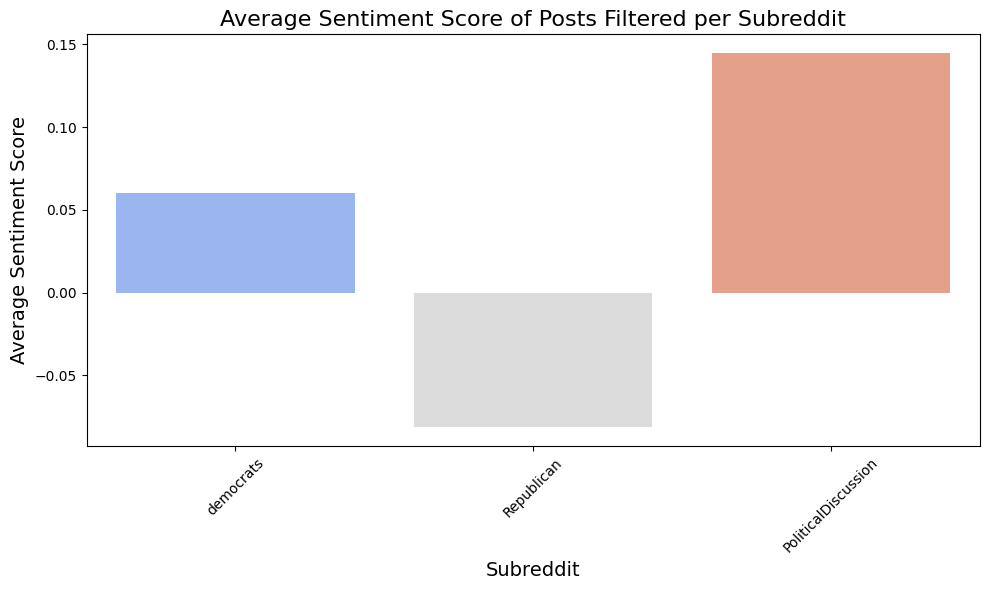

/var/folders/3k/v4jx042d3j143170j5840qv40000gn/T/ipykernel_62173/395197707.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subreddit', y='compound_sentiment_score', data=average_sentiment, palette='coolwarm', order=ordered_subreddits)


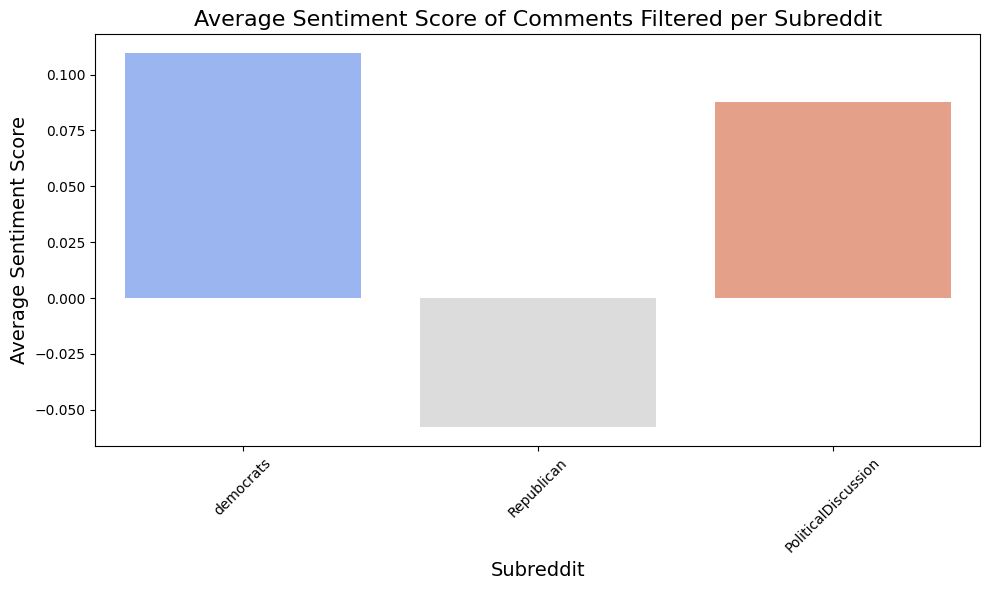

In [64]:
#plot_average_sentiment(all_post)
plot_average_sentiment(posts_scored, "Posts Scored")
plot_average_sentiment(comments_scored, "Comments Scored")

plot_average_sentiment(posts_filtered, "Posts Filtered")
plot_average_sentiment(comments_filtered, "Comments Filtered")